# Customer Segmentation using Clustering
This notebook applies clustering techniques (KMeans, DBSCAN, Hierarchical) on the Mall Customers dataset to group customers into meaningful segments.


## 1. Import Libraries and Load Dataset


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 2. Exploratory Data Analysis (EDA)
We visualize relationships between features such as Age, Annual Income, and Spending Score to understand the dataset.


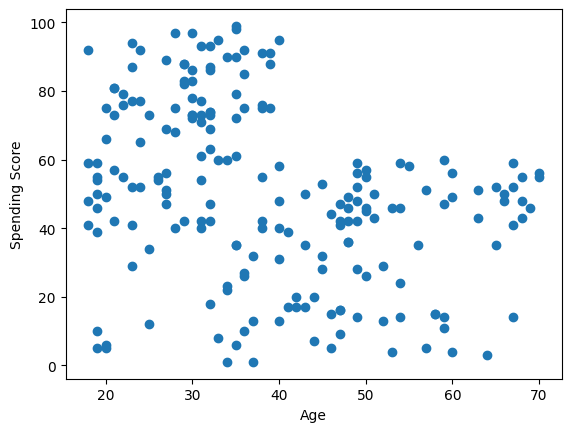

In [ ]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

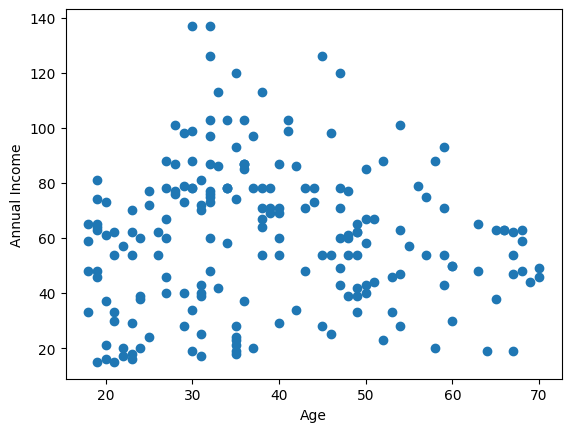

In [ ]:
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

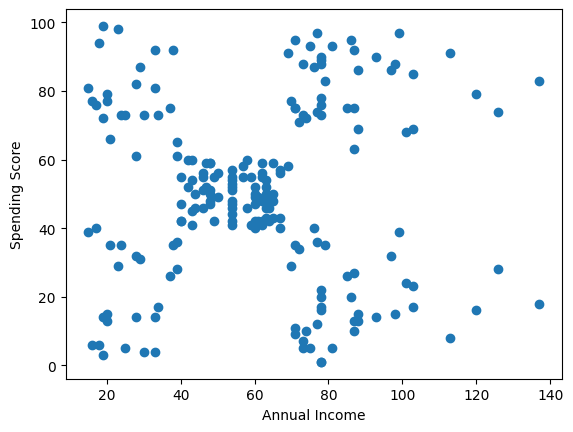

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## 3. Choosing the Optimal Number of Clusters (Elbow Method)


In [ ]:
sse = []
for i in range(1, 10):
    km = KMeans(n_clusters =  i)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(km.inertia_)

In [ ]:
sse

[269981.28000000014,
 183069.17582751295,
 106348.37306211119,
 82472.19413919412,
 44454.47647967972,
 37239.83554245604,
 30259.657207285458,
 26118.50230880231,
 23684.28450936869]

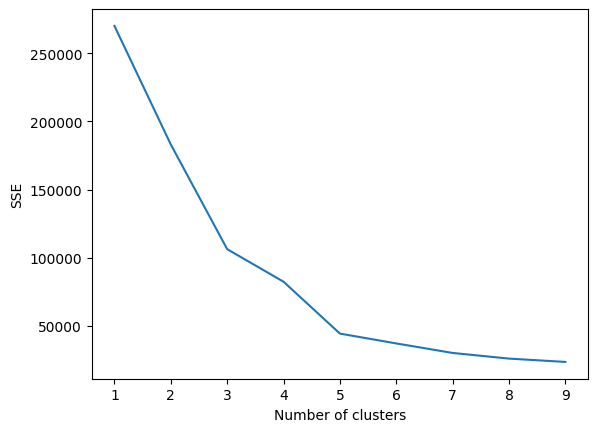

In [ ]:
plt.xlabel('Number of clusters')
plt.ylabel("SSE")
plt.plot(range(1,10), sse)

## 4. KMeans Clustering (2 Features: Income & Spending Score)

In [ ]:
km = KMeans(n_clusters = 5)
predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
predicted

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0], dtype=int32)

In [ ]:
df['Cluster'] = predicted
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,4
197,198,Male,32,126,74,0
198,199,Male,32,137,18,4


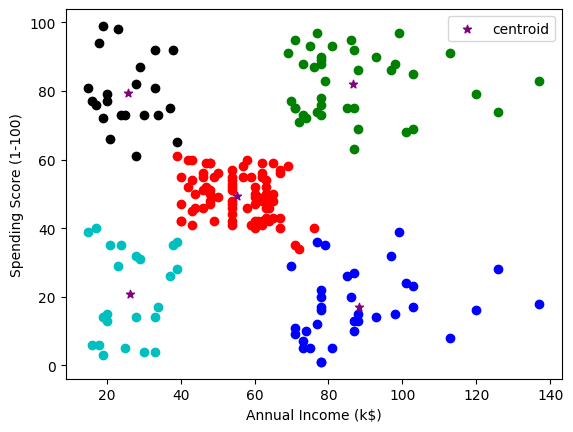

In [ ]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]
df5 = df[df.Cluster==4]

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='c')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
            color='purple',marker='*',label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

## 5. Scaling and KMeans with 3 Features (Age, Income, Spending Score)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster centers
print("KMeans Cluster Centers (scaled):")
print(kmeans.cluster_centers_)

KMeans Cluster Centers (scaled):
[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]


## 6. Cluster Summary (KMeans)

In [ ]:
cluster_summary = df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                       
0               55.275862           47.620690               41.706897
1               32.875000           86.100000               81.525000
2               25.769231           26.115385               74.846154
3               26.733333           54.311111               40.911111
4               44.387097           89.774194               18.483871


## 7. 3D Visualization of KMeans Clusters

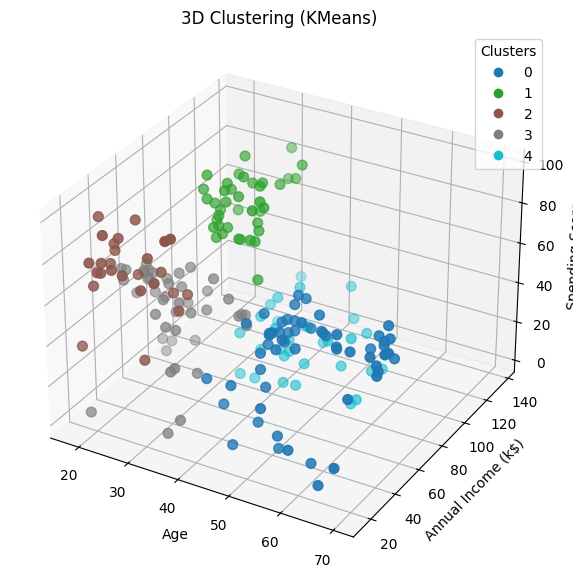

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['KMeans_Cluster'], cmap='tab10', s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
ax.set_title("3D Clustering (KMeans)")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

## 8. DBSCAN Clustering

DBSCAN Clusters:
DBSCAN_Cluster
0    200
Name: count, dtype: int64


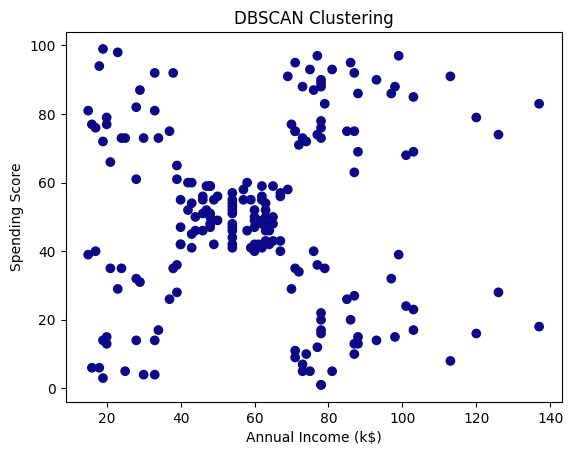

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

print("DBSCAN Clusters:")
print(df['DBSCAN_Cluster'].value_counts())

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['DBSCAN_Cluster'], cmap='plasma')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title("DBSCAN Clustering")
plt.show()

## 9. Hierarchical Clustering

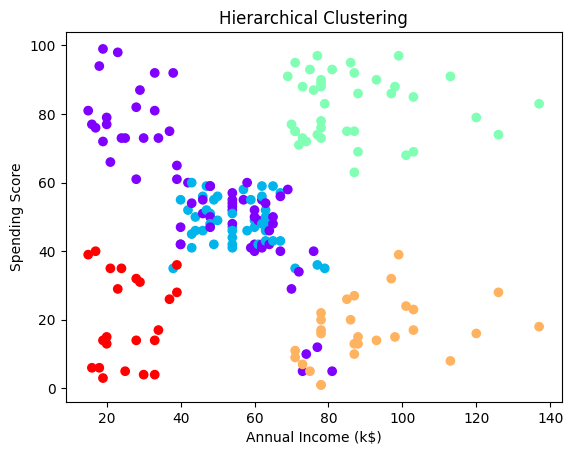

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5)
df['HC_Cluster'] = hc.fit_predict(X_scaled)

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['HC_Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title("Hierarchical Clustering")
plt.show()

## 10. Model Evaluation (Silhouette Score)

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_score = silhouette_score(X_scaled, df['KMeans_Cluster'])
print("Silhouette Score (KMeans):", kmeans_score)

if len(set(df['DBSCAN_Cluster'])) > 1:
    dbscan_score = silhouette_score(X_scaled, df['DBSCAN_Cluster'])
    print("Silhouette Score (DBSCAN):", dbscan_score)
else:
    print("DBSCAN found only 1 cluster, silhouette score not applicable.")

hc_score = silhouette_score(X_scaled, df['HC_Cluster'])
print("Silhouette Score (Hierarchical):", hc_score)

Silhouette Score (KMeans): 0.40846873777345605
DBSCAN found only 1 cluster, silhouette score not applicable.
Silhouette Score (Hierarchical): 0.39002826186267214


## 11. Insights and Conclusions

In [ ]:
print("Insights from Clusters:")
for cluster_id, row in cluster_summary.iterrows():
    print(f"Cluster {cluster_id}: Avg Age={row['Age']:.1f}, "
          f"Avg Income={row['Annual Income (k$)']:.1f}, "
          f"Avg Spending Score={row['Spending Score (1-100)']:.1f}")

🔎 Insights from Clusters:
Cluster 0: Avg Age=55.3, Avg Income=47.6, Avg Spending Score=41.7
Cluster 1: Avg Age=32.9, Avg Income=86.1, Avg Spending Score=81.5
Cluster 2: Avg Age=25.8, Avg Income=26.1, Avg Spending Score=74.8
Cluster 3: Avg Age=26.7, Avg Income=54.3, Avg Spending Score=40.9
Cluster 4: Avg Age=44.4, Avg Income=89.8, Avg Spending Score=18.5
